# 3. Gradient Descent Methods Convergence

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io
poly = scipy.io.loadmat("gradient_descent_data.mat")

x=poly['x']
y=poly['y']

Part A: 

Find the gradient of the loss function $$ \min_w \frac{1}{n} \sum_{i=1}^n \frac{1}{2} (A_i^T w-y_i)^2$$
$$\nabla = \frac{1}{n} \sum_{i=1}^n (A_i^T w-y_i)*A_i^T$$

In [14]:
# parts taken from hw 6 - gradient descent problem

def compute_gradient_of_loss(w,A,y):
    grad=np.zeros((1,2))
    for i in range(0,len(y)):
        grad=grad+(np.dot(A[i,:],w)-y[i])*np.transpose(A[i,:])
#         print(grad)
    grad=grad/(len(y))
    return grad

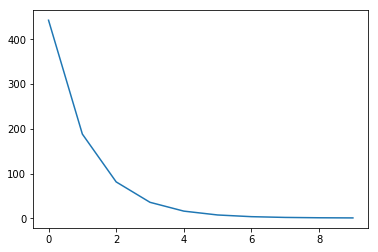

In [154]:
# initialize w at zero
w=np.zeros((2,10))
# learning rate is 0.05
lr=0.05
mse=np.zeros(10)

#apply batch gradient descent 10 times
for j in range(0,9):
    grad=compute_gradient_of_loss(w[:,j],x,y)
    w[:,j+1] = w[:,j]-lr*grad
    error=0
    for k in range(0,len(y)):
        error=error+(np.dot(x[k,:],w[:,j])-y[k])**2
    mse[j]=1/(len(y))*error

error=0
for k in range(0,len(y)):
    error=error+(np.dot(x[k,:],w[:,9])-y[k])**2
mse[9]=1/(len(y))*error

plt.plot(mse)
plt.show()

Part B:

In [30]:
def compute_gradient_of_loss_single(w,A,y):
    grad=np.zeros((1,2))
    grad=grad+(np.dot(A,w)-y)*np.transpose(A)
    grad=grad/(len(y))
    return grad

Learning rate is 5e-05


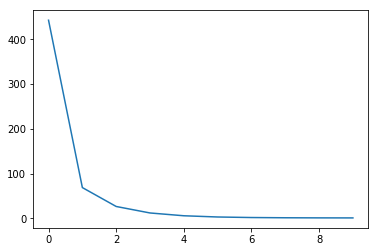

Learning rate is 7.500000000000001e-05


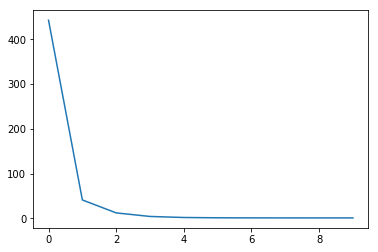

Learning rate is 0.0001


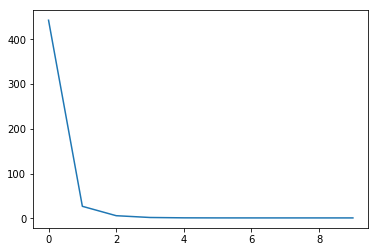

Learning rate is 0.000125


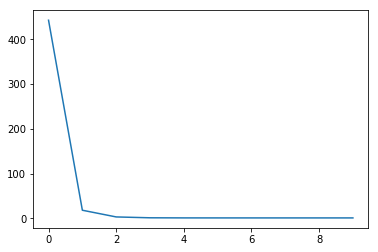

Learning rate is 0.00025


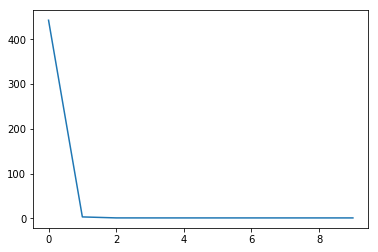

In [155]:
# apply a standard stochastic gradient descent algorithm with minibatch
# size of one with fixed learning rate α = 0.05
# calculates the error and updates the model for each example in the training dataset
# what does increasing the learning rate do?
a=5*10**-5
lr_list=[a, 1.5*a, 2*a, 2.5*a,5*a]
# lr_list=[a]

for l in range(0,len(lr_list)):
    
    # initialize w at zero
    w=np.zeros((2,10))
    # learning rate is 0.05
    lr=lr_list[l]
    mse=np.zeros(10)

    # calculate initial error
    error=0
    for k in range(0,len(y)):
        error=error+(np.dot(x[k,:],w[:,0])-y[k])**2
    mse[0]=1/(len(y))*error

    # apply stochastic gradient descent 10 iterations
    # now we want to update the gradient for each minibatch=1
    for j in range(0,9):
#         for i in range(0,len(y)):
#             grad=compute_gradient_of_loss_single(w[:,j],x[i,:],y[i])
#             w[:,j+1] = w[:,j]-lr*grad
        ws=w[:,j]
        for i in range(0,len(y)):
            grad=compute_gradient_of_loss_single(ws,x[i,:],y[i])
            ws = ws-lr*grad[0,:]
        w[:,j+1]=ws

        # but only plot error after seeing every training point
        error=0
        for k in range(0,len(y)):
            error=error+(np.dot(x[k,:],w[:,j+1])-y[k])**2
        mse[j+1]=1/(len(y))*error

    plt.plot(mse)
    print("Learning rate is",lr)
    plt.show()


When we increase the learning rate, the error decreases faster

Part C:

In this part, we want to compare the three options for doing coordinate descent - where we look at the features instead of samples.
During each iteration, we will uniformaly sample whether to look at feature 1 or 2.  Then we want to compare
1. Full least-squares solution
2. Gradient Descent
3. Stochastic Gradient descent with minibatch=1

Least Square MSE


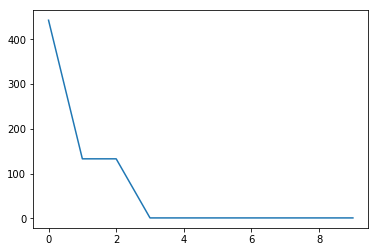

Gradient Descent MSE


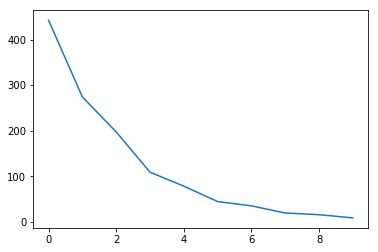

Stochastic Gradient Descent MSE


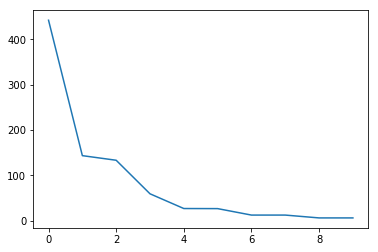

In [113]:
# initialize w at zero
w_ls=np.zeros((2,10))
w_gd=np.zeros((2,10))
w_sgd=np.zeros((2,10))

lr_gd=0.05 # learning rate is 0.05 for gd
# learning rate is 5 e-5 for stochastic gd
a=5*10**-5
# lr_list=[a, 1.5*a, 2*a, 2.5*a,5*a]
lr_sgd=a
mse_ls=np.zeros(10)
mse_gd=np.zeros(10)
mse_sgd=np.zeros(10)

# calculate initial error (w=0 for all)
error=0
for k in range(0,len(y)):
    error=error+(np.dot(x[k,:],w_ls[:,0])-y[k])**2
mse_ls[0]=1/(len(y))*error
mse_gd[0]=1/(len(y))*error
mse_sgd[0]=1/(len(y))*error

# apply the three methods for 10 iterations
# we want to randomly select which feature to update each iteraion
for j in range(0,9):
    # set the ws to be the previous w from last iteration - then can only change one feature of w
    w_ls[:,j+1]=w_ls[:,j]
    w_gd[:,j+1]=w_gd[:,j]
    w_sgd[:,j+1]=w_sgd[:,j]
    
    # randomly choose the feature to update - i.e. which column of x
    # return 0 with prob 0.5 and 1 with prob 0.5
    feature = np.random.binomial(1, 0.5)
        
    # 1. update the LS solution
    w=np.dot(np.linalg.inv(np.dot(np.transpose(x),x)),np.dot(np.transpose(x),y))
    w_ls[feature,j+1]=w[feature]
        
    # 2. update the GD solution
    grad=compute_gradient_of_loss(w_gd[:,j],x,y)
    w = w_gd[:,j]-lr_gd*grad
    w_gd[feature,j+1]=w[0,feature]
        
    # 3. update the SGD solution
    w=w_sgd[:,j]
    for i in range(0,len(y)):
        grad=compute_gradient_of_loss_single(w,x[i,:],y[i])
        w = w-lr_sgd*grad[0,:]
    w_sgd[feature,j+1]=w[feature]

    # calculate error for each method
    error_ls=0
    error_gd=0
    error_sgd=0
    for k in range(0,len(y)):
        error_ls=error_ls+(np.dot(x[k,:],w_ls[:,j+1])-y[k])**2
        error_gd=error_gd+(np.dot(x[k,:],w_gd[:,j+1])-y[k])**2
        error_sgd=error_sgd+(np.dot(x[k,:],w_sgd[:,j+1])-y[k])**2
    mse_ls[j+1]=1/(len(y))*error_ls
    mse_gd[j+1]=1/(len(y))*error_gd
    mse_sgd[j+1]=1/(len(y))*error_sgd

plt.plot(mse_ls)
print("Least Square MSE")
plt.show()

plt.plot(mse_gd)
print("Gradient Descent MSE")
plt.show()

plt.plot(mse_sgd)
print("Stochastic Gradient Descent MSE")
plt.show()

The least square method is limited in computation by the randomness in choosing which feature to update but once it changes both features, the error is very low.  The gradient descent coordinate method actually converges slower to a low error than the sample method.  The stochastic gradient descent coordinate method converges more slowly than the sample method.

Part D:

Apply randomized Kaczmarz stochastic gradient descent. 
$$w^t=w^{t-1}-\alpha_j \nabla l_j(w^{t-1})$$

If we use np.random.choice to select the j that we're using, then we need to construct a probability vector
np.random.choice(n, 1, p=[prob(j=0), prob(j=1)...])

In [157]:
def compute_gradient_of_loss_singles(w,A,y):
    grad=np.zeros((2,1))
    grad=grad+(np.dot(A,w)-y)*np.transpose(A)
    grad=grad/(len(y))
    return grad

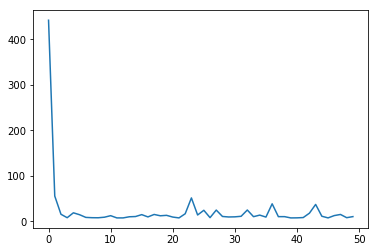

In [165]:
# initialize w at zero
# m=10*len(y) # iterations
m=50
w=np.zeros((2,m))
mse=np.zeros(m)

error=0
for k in range(0,len(y)):
    error=error+(np.dot(x[k,:],w[:,0])-y[k])**2
mse[0]=1/(len(y))*error

# probabilities of the J values
prob=np.zeros(len(y))
A_frob=(np.linalg.norm(x, 'fro'))**2
for l in range(0,len(y)):
    prob[l]=((np.linalg.norm(x[l,:], 2))**2)/A_frob


#apply Kaczmarz gradient descent m times
for j in range(0,m-1):
    # first we want to find which J is chosen
    J=np.random.choice(len(y), 1, p=prob)
    
    # calculate the gradient for that one training sample
    ws=w[:,j]
    grad=compute_gradient_of_loss_singles(ws,x[J,:],y[J])
    
    #calculate the learning rate for J
    lr= 1/(np.linalg.norm(x[J,:], 2)**2)
    
    w[:,j+1] = w[:,j]-lr*grad[0,:]
    error=0
    for k in range(0,len(y)):
        error=error+np.power((np.dot(x[k,:],w[:,j+1])-y[k]),2)
    mse[j+1]=1/(len(y))*error

plt.plot(mse)
plt.show()

Above I have plotted the samples taken over instead of the iterations=all samples as above.  This method converges very quickly to a small error but could move in the wrong direction again when by chance a sample is chosen that moves it the wrong way.

Part E:

In [195]:
# add nonlinearity to y and repeat the previous parts
a2 = x[:,1]
ynew = y + 0.1*(np.power(a2,3).reshape(len(y),1))

Least Square MSE


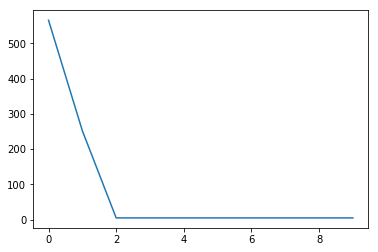

Gradient Descent MSE


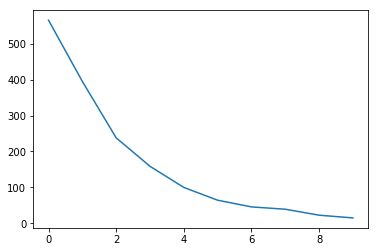

Stochastic Gradient Descent MSE


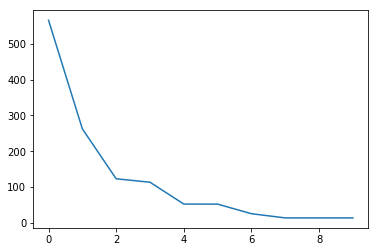

Kaczmarz stochastic gradient descent MSE


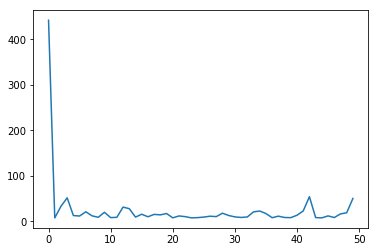

In [196]:
# initialize w at zero
w_ls=np.zeros((2,10))
w_gd=np.zeros((2,10))
w_sgd=np.zeros((2,10))

lr_gd=0.05 # learning rate is 0.05 for gd
# learning rate is 5 e-5 for stochastic gd
a=5*10**-5
# lr_list=[a, 1.5*a, 2*a, 2.5*a,5*a]
lr_sgd=a
mse_ls=np.zeros(10)
mse_gd=np.zeros(10)
mse_sgd=np.zeros(10)

# calculate initial error (w=0 for all)
error=0
for k in range(0,len(ynew)):
    error=error+(np.dot(x[k,:],w_ls[:,0])-ynew[k])**2
mse_ls[0]=1/(len(ynew))*error
mse_gd[0]=1/(len(ynew))*error
mse_sgd[0]=1/(len(ynew))*error

# apply the three methods for 10 iterations
# we want to randomly select which feature to update each iteraion
for j in range(0,9):
    # set the ws to be the previous w from last iteration - then can only change one feature of w
    w_ls[:,j+1]=w_ls[:,j]
    w_gd[:,j+1]=w_gd[:,j]
    w_sgd[:,j+1]=w_sgd[:,j]
    
    # randomly choose the feature to update - i.e. which column of x
    # return 0 with prob 0.5 and 1 with prob 0.5
    feature = np.random.binomial(1, 0.5)
        
    # 1. update the LS solution
    w=np.dot(np.linalg.inv(np.dot(np.transpose(x),x)),np.dot(np.transpose(x),ynew))
    w_ls[feature,j+1]=w[feature]
        
    # 2. update the GD solution
    grad=compute_gradient_of_loss(w_gd[:,j],x,ynew)
    w = w_gd[:,j]-lr_gd*grad
    w_gd[feature,j+1]=w[0,feature]
        
    # 3. update the SGD solution
    w=w_sgd[:,j]
    for i in range(0,len(y)):
        grad=compute_gradient_of_loss_single(w,x[i,:],ynew[i])
        w = w-lr_sgd*grad[0,:]
    w_sgd[feature,j+1]=w[feature]

    # calculate error for each method
    error_ls=0
    error_gd=0
    error_sgd=0
    for k in range(0,len(y)):
        error_ls=error_ls+(np.dot(x[k,:],w_ls[:,j+1])-ynew[k])**2
        error_gd=error_gd+(np.dot(x[k,:],w_gd[:,j+1])-ynew[k])**2
        error_sgd=error_sgd+(np.dot(x[k,:],w_sgd[:,j+1])-ynew[k])**2
    mse_ls[j+1]=1/(len(y))*error_ls
    mse_gd[j+1]=1/(len(y))*error_gd
    mse_sgd[j+1]=1/(len(y))*error_sgd

plt.plot(mse_ls)
print("Least Square MSE")
plt.show()

plt.plot(mse_gd)
print("Gradient Descent MSE")
plt.show()

plt.plot(mse_sgd)
print("Stochastic Gradient Descent MSE")
plt.show()

# initialize w at zero
# m=10*len(y) # iterations
m=50
w=np.zeros((2,m))
mse=np.zeros(m)

error=0
for k in range(0,len(y)):
    error=error+(np.dot(x[k,:],w[:,0])-y[k])**2
mse[0]=1/(len(y))*error

# probabilities of the J values
prob=np.zeros(len(y))
A_frob=(np.linalg.norm(x, 'fro'))**2
for l in range(0,len(y)):
    prob[l]=((np.linalg.norm(x[l,:], 2))**2)/A_frob


#apply Kaczmarz gradient descent m times
for j in range(0,m-1):
    # first we want to find which J is chosen
    J=np.random.choice(len(y), 1, p=prob)
    
    # calculate the gradient for that one training sample
    ws=w[:,j]
    grad=compute_gradient_of_loss_singles(ws,x[J,:],y[J])
    
    #calculate the learning rate for J
    lr= 1/(np.linalg.norm(x[J,:], 2)**2)
    
    w[:,j+1] = w[:,j]-lr*grad[0,:]
    error=0
    for k in range(0,len(y)):
        error=error+np.power((np.dot(x[k,:],w[:,j+1])-y[k]),2)
    mse[j+1]=1/(len(y))*error

plt.plot(mse)
print("Kaczmarz stochastic gradient descent MSE")
plt.show()